## Cargo librerias

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io as io
from scipy.stats import linregress as lr
import seaborn as sn
import pandas as pd
from numpy import polyfit as pf
from sklearn.metrics import r2_score
from scipy.stats import norm
from textwrap import wrap
sn.set_style("whitegrid")
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.edgecolor'] = '#505b63'
mpl.rcParams['xtick.labelsize']=20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['ytick.labelsize']=20
mpl.rcParams['axes.titlesize']=23
mpl.rcParams['figure.titlesize']=26
mpl.rcParams['legend.fontsize']=15
mpl.rcParams.update({'lines.markeredgewidth': 1})


## Cargo datos

In [77]:
medicion = pd.read_csv('motor taunus/Medicion_Banco_4posiciones.csv', index_col=False)
print(medicion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tiempo[seg]        784 non-null    float64
 1   RPM_motor          784 non-null    float64
 2   Torque_motor[kgm]  784 non-null    float64
 3   Potencia[HP]       784 non-null    float64
 4   Marcha             784 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 30.8 KB
None


## Ploteo RPM en funcion del tiempo para verificar selección de regimenes

D:\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


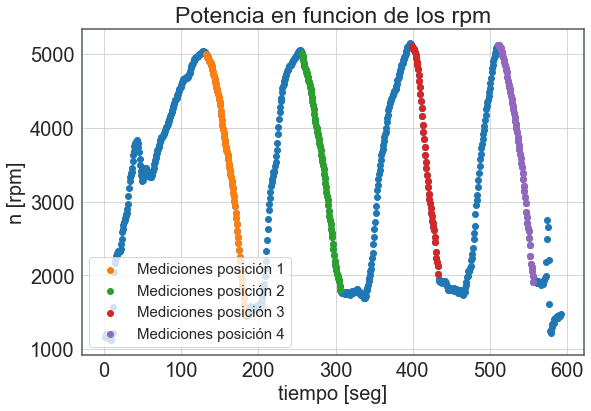

In [78]:
rpm_1 = np.array(medicion['RPM_motor'][180:250])
pot_1 = np.array(medicion['Potencia[HP]'][180:250])
t_1 = np.array(medicion['Tiempo[seg]'][180:250])
pf_1, cov_1 = pf(rpm_1, pot_1, 3, cov=True)
cov_1 = np.sqrt(cov_1)
aj_1 = np.polyval(pf_1, rpm_1)

rpm_2 = np.array(medicion['RPM_motor'][348:415])
pot_2 = np.array(medicion['Potencia[HP]'][348:415])
t_2 = np.array(medicion['Tiempo[seg]'][348:415])
pf_2, cov_2 = pf(rpm_2, pot_2, 3, cov=True)
aj_2 = np.polyval(pf_2, rpm_2)

rpm_3 = np.array(medicion['RPM_motor'][535:581])
pot_3 = np.array(medicion['Potencia[HP]'][535:581])
t_3 = np.array(medicion['Tiempo[seg]'][535:581])
pf_3, cov_3 = pf(rpm_3, pot_3, 3, cov=True)
aj_3 = np.polyval(pf_3, rpm_3)

rpm_4 = np.array(medicion['RPM_motor'][680:739])
pot_4 = np.array(medicion['Potencia[HP]'][680:739])
t_4 = np.array(medicion['Tiempo[seg]'][680:739])
pf_4, cov_4 = pf(rpm_4, pot_4, 3, cov=True)
aj_4 = np.polyval(pf_4, rpm_4)

fig = plt.figure(figsize=(9,6))
plt.scatter(medicion['Tiempo[seg]'], medicion['RPM_motor'])
plt.scatter(t_1, rpm_1, label='Mediciones posición 1')
plt.scatter(t_2, rpm_2, label='Mediciones posición 2')
plt.scatter(t_3, rpm_3, label='Mediciones posición 3')
plt.scatter(t_4, rpm_4, label='Mediciones posición 4')
plt.ylabel('n [rpm]')
plt.xlabel('tiempo [seg]')
plt.title('Potencia en funcion de los rpm')
plt.legend()
plt.show()

D:\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
D:\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()
D:\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt
D:\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in sqrt


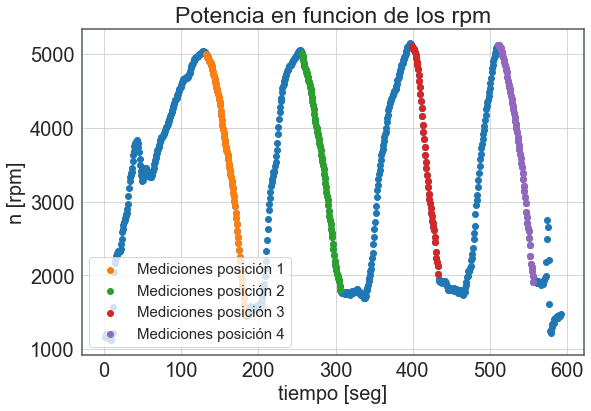

In [79]:
rpm_1 = np.array(medicion['RPM_motor'][180:250])
pot_1 = np.array(medicion['Potencia[HP]'][180:250])
t_1 = np.array(medicion['Tiempo[seg]'][180:250])
pf_1, cov_1 = pf(rpm_1-np.mean(rpm_1), pot_1-np.mean(pot_1), 3, cov=True)
cov_1 = np.sqrt(cov_1)
aj_1 = np.polyval(pf_1, rpm_1-np.mean(rpm_1))+np.mean(pot_1)
er_1 = (cov_1[0,0]*(rpm_1-np.mean(rpm_1))**2+cov_1[1,1]*(rpm_1-np.mean(rpm_1))**2+cov_1[2,2]*(rpm_1-np.mean(rpm_1))+cov_1[3,3])
aj_1_p = aj_1+er_1
aj_1_m = aj_1-er_1


rpm_2 = np.array(medicion['RPM_motor'][348:415])
pot_2 = np.array(medicion['Potencia[HP]'][348:415])
t_2 = np.array(medicion['Tiempo[seg]'][348:415])
pf_2, cov_2 = pf(rpm_2-np.mean(rpm_2), pot_2-np.mean(pot_2), 3, cov=True)
cov_2 = np.sqrt(cov_2)
aj_2 = np.polyval(pf_2, rpm_2-np.mean(rpm_2))+np.mean(pot_2)
aj_2_p = (np.polyval(pf_2, rpm_2-np.mean(rpm_2))+np.mean(pot_2))+(cov_2[0,0]*(rpm_2-np.mean(rpm_2))**2+cov_2[1,1]*(rpm_2-np.mean(rpm_2))**2+cov_2[2,2]*(rpm_2-np.mean(rpm_2))+cov_2[3,3])
aj_2_m = (np.polyval(pf_2, rpm_2-np.mean(rpm_2))+np.mean(pot_2))-(cov_2[0,0]*(rpm_2-np.mean(rpm_2))**2+cov_2[1,1]*(rpm_2-np.mean(rpm_2))**2+cov_2[2,2]*(rpm_2-np.mean(rpm_2))+cov_2[3,3])

rpm_3 = np.array(medicion['RPM_motor'][535:581])
pot_3 = np.array(medicion['Potencia[HP]'][535:581])
t_3 = np.array(medicion['Tiempo[seg]'][535:581])
pf_3, cov_3 = pf(rpm_3-np.mean(rpm_3), pot_3-np.mean(pot_3), 3, cov=True)
cov_3 = np.sqrt(cov_3)
aj_3 = np.polyval(pf_3, rpm_3-np.mean(rpm_3))+np.mean(pot_3)
aj_3_p = (np.polyval(pf_3, rpm_3-np.mean(rpm_3))+np.mean(pot_3))+(cov_3[0,0]*(rpm_3-np.mean(rpm_3))**2+cov_3[1,1]*(rpm_3-np.mean(rpm_3))**2+cov_3[2,2]*(rpm_3-np.mean(rpm_3))+cov_3[3,3])
aj_3_m = (np.polyval(pf_3, rpm_3-np.mean(rpm_3))+np.mean(pot_3))-(cov_3[0,0]*(rpm_3-np.mean(rpm_3))**2+cov_3[1,1]*(rpm_3-np.mean(rpm_3))**2+cov_3[2,2]*(rpm_3-np.mean(rpm_3))+cov_3[3,3])

rpm_4 = np.array(medicion['RPM_motor'][680:739])
pot_4 = np.array(medicion['Potencia[HP]'][680:739])
t_4 = np.array(medicion['Tiempo[seg]'][680:739])
pf_4, cov_4 = pf(rpm_4-np.mean(rpm_4), pot_4-np.mean(pot_4), 3, cov=True)
cov_4 = np.sqrt(cov_4)
aj_4 = np.polyval(pf_4, rpm_4-np.mean(rpm_4))+np.mean(pot_4)
aj_4_p = (np.polyval(pf_4, rpm_4-np.mean(rpm_4))+np.mean(pot_4))+(cov_4[0,0]*(rpm_4-np.mean(rpm_4))**2+cov_4[1,1]*(rpm_4-np.mean(rpm_4))**2+cov_4[2,2]*(rpm_4-np.mean(rpm_4))+cov_4[3,3])
aj_4_m = (np.polyval(pf_4, rpm_4-np.mean(rpm_4))+np.mean(pot_4))-(cov_4[0,0]*(rpm_4-np.mean(rpm_4))**2+cov_4[1,1]*(rpm_4-np.mean(rpm_4))**2+cov_4[2,2]*(rpm_4-np.mean(rpm_4))+cov_4[3,3])

fig = plt.figure(figsize=(9,6))
plt.scatter(medicion['Tiempo[seg]'], medicion['RPM_motor'])
plt.scatter(t_1, rpm_1, label='Mediciones posición 1')
plt.scatter(t_2, rpm_2, label='Mediciones posición 2')
plt.scatter(t_3, rpm_3, label='Mediciones posición 3')
plt.scatter(t_4, rpm_4, label='Mediciones posición 4')
plt.ylabel('n [rpm]')
plt.xlabel('tiempo [seg]')
plt.title('Potencia en funcion de los rpm')
plt.legend()
plt.show()

## Ploteo y ajuste de potencia en función de las rpm

Ajuste potencia posición 1: [c0=3.23, c1=-4.63E-03, c2=-2.74E-06, c3=3.14E-10], r2=0.6950924059394901
Ajuste potencia posición 2: [c0=2.77, c1=1.60E-03, c2=-2.73E-06, c3=2.87E-10], r2=0.7448242867363286
Ajuste potencia posición 3: [c0=3.09, c1=4.87E-03, c2=-3.01E-06, c3=-7.02E-10], r2=0.858322938562139
Ajuste potencia posición 4: [c0=2.93, c1=5.28E-03, c2=-3.06E-06, c3=1.31E-11], r2=0.9217755069762783
Ajuste máximos: [c0=856.46, c1=8.68E+01], r2=0.9914684005472948


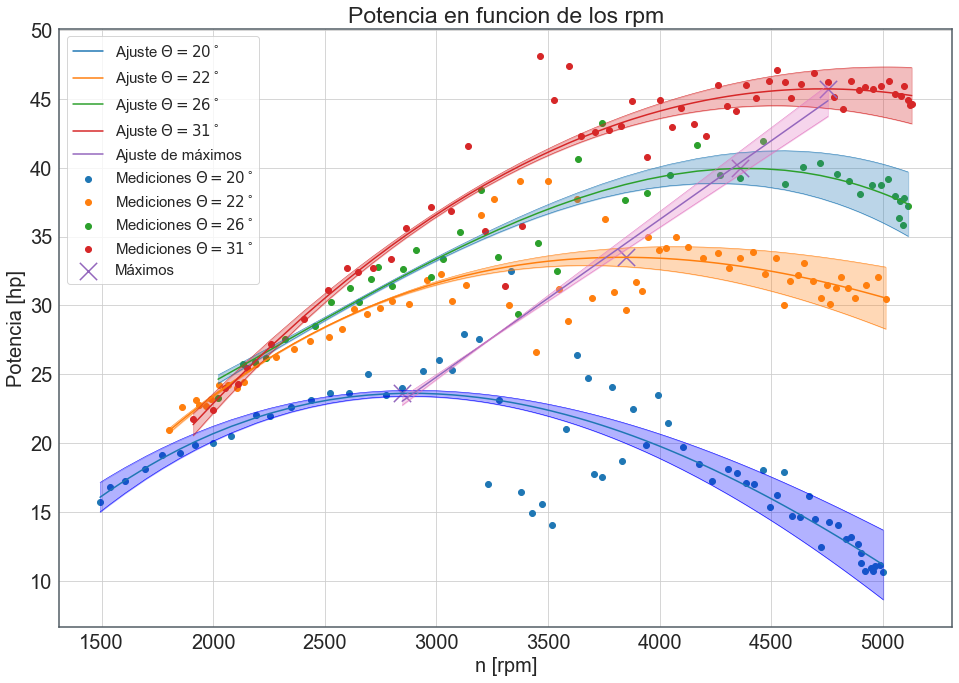

In [80]:
print('Ajuste potencia posición 1: [c0={:.2f}, c1={:.2E}, c2={:.2E}, c3={:.2E}], r2={}'.format(pf_1[3], pf_1[2], pf_1[1], pf_1[0], r2_score(pot_1, aj_1)))
print('Ajuste potencia posición 2: [c0={:.2f}, c1={:.2E}, c2={:.2E}, c3={:.2E}], r2={}'.format(pf_2[3], pf_2[2], pf_2[1], pf_2[0], r2_score(pot_2, aj_2)))
print('Ajuste potencia posición 3: [c0={:.2f}, c1={:.2E}, c2={:.2E}, c3={:.2E}], r2={}'.format(pf_3[3], pf_3[2], pf_3[1], pf_3[0], r2_score(pot_3, aj_3)))
print('Ajuste potencia posición 4: [c0={:.2f}, c1={:.2E}, c2={:.2E}, c3={:.2E}], r2={}'.format(pf_4[3], pf_4[2], pf_4[1], pf_4[0], r2_score(pot_4, aj_4)))

maxs = np.array([np.max(aj_1), np.max(aj_2), np.max(aj_3), np.max(aj_4)])
rpm_maxs = np.array([rpm_1[np.argmax(aj_1)], rpm_2[np.argmax(aj_2)], rpm_3[np.argmax(aj_3)], rpm_4[np.argmax(aj_4)]])
lr_maxs = lr(maxs, rpm_maxs)
pf_maxs, cov_maxs = pf(rpm_maxs-np.mean(rpm_maxs), maxs-np.mean(maxs), 1, cov=True)
cov_maxs = np.sqrt(cov_maxs)
aux = np.array([np.min(rpm_maxs)-200, np.max(rpm_maxs)+200])
aj_maxs = np.polyval(pf_maxs, rpm_maxs-np.mean(rpm_maxs))+np.mean(maxs)
aj_maxs_p = aj_maxs+(cov_maxs[0,0]*(rpm_maxs-np.mean(rpm_maxs))+cov_maxs[1,1]) 
aj_maxs_m = aj_maxs-(cov_maxs[0,0]*(rpm_maxs-np.mean(rpm_maxs))+cov_maxs[1,1]) 
print('Ajuste máximos: [c0={:.2f}, c1={:.2E}], r2={}'.format(lr_maxs.intercept, lr_maxs.slope, lr_maxs.rvalue**2))

fig = plt.figure(figsize=(16,11))
plt.scatter(rpm_1, pot_1, label=r'Mediciones $\Theta=20^\circ$')
plt.plot(rpm_1, aj_1, label=r'Ajuste $\Theta=20^\circ$')
plt.fill_between(rpm_1, aj_1_p, aj_1_m, color='blue', alpha=0.3)
plt.plot(rpm_1, aj_1_p, color='blue', linewidth=0.5)
plt.plot(rpm_1, aj_1_m, color='blue', linewidth=0.5)

plt.scatter(rpm_2, pot_2, label=r'Mediciones $\Theta=22^\circ$')
plt.plot(rpm_2, aj_2, label=r'Ajuste $\Theta=22^\circ$')
plt.fill_between(rpm_2, aj_2_p, aj_2_m, color='C1', alpha=0.3)
plt.plot(rpm_2, aj_2_p, color='C1', linewidth=0.5)
plt.plot(rpm_2, aj_2_m, color='C1', linewidth=0.5)

plt.scatter(rpm_3, pot_3, label=r'Mediciones $\Theta=26^\circ$')
plt.plot(rpm_3, aj_3, label=r'Ajuste $\Theta=26^\circ$')
plt.fill_between(rpm_3, aj_3_p, aj_3_m, color='C0', alpha=0.3)
plt.plot(rpm_3, aj_3_p, color='C0', linewidth=0.5)
plt.plot(rpm_3, aj_3_m, color='C0', linewidth=0.5)

plt.scatter(rpm_4, pot_4, label=r'Mediciones $\Theta=31^\circ$')
plt.plot(rpm_4, aj_4, label=r'Ajuste $\Theta=31^\circ$')
plt.fill_between(rpm_4, aj_4_p, aj_4_m, color='C3', alpha=0.3)
plt.plot(rpm_4, aj_4_p, color='C3', linewidth=0.5)
plt.plot(rpm_4, aj_4_m, color='C3', linewidth=0.5)

plt.plot(rpm_maxs, aj_maxs, label='Ajuste de máximos')
plt.scatter(rpm_maxs, maxs, marker='x', s=300, label='Máximos')
plt.fill_between(rpm_maxs, aj_maxs_p, aj_maxs_m, color='C6', alpha=0.3)
plt.plot(rpm_maxs, aj_maxs_p, color='C6', linewidth=0.5)
plt.plot(rpm_maxs, aj_maxs_m, color='C6', linewidth=0.5)

plt.xlabel('n [rpm]')
plt.ylabel('Potencia [hp]')
plt.title('Potencia en funcion de los rpm')
plt.legend()
plt.savefig('pot_rpm.pdf', format='pdf')
plt.show()

## Cálculo potencia indicada

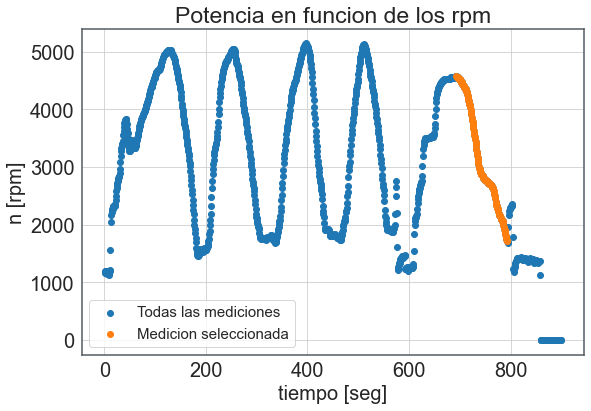

In [81]:
medicion_3b = pd.read_csv('motor taunus/Medicion_Banco_1posicion_3bujias.csv', index_col=False)
pot_3b = medicion_3b['Potencia[HP]'][918:1050]
t_3b = medicion_3b['Tiempo[seg]'][918:1050]
rpm_3b = medicion_3b['RPM_motor'][918:1050]
fig = plt.figure(figsize=(9,6))
plt.scatter(medicion_3b['Tiempo[seg]'], medicion_3b['RPM_motor'], label='Todas las mediciones')
plt.scatter(t_3b, rpm_3b, label='Medicion seleccionada')
plt.ylabel('n [rpm]')
plt.xlabel('tiempo [seg]')
plt.title('Potencia en funcion de los rpm')
plt.legend()
plt.show()

D:\Anaconda3\envs\DL\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


Ajuste potencia posición 1 3 bujías: [c0=2.11, c1=-3.00E-03, c2=-2.61E-06, c3=2.45E-11], r2=0.6950924059394901


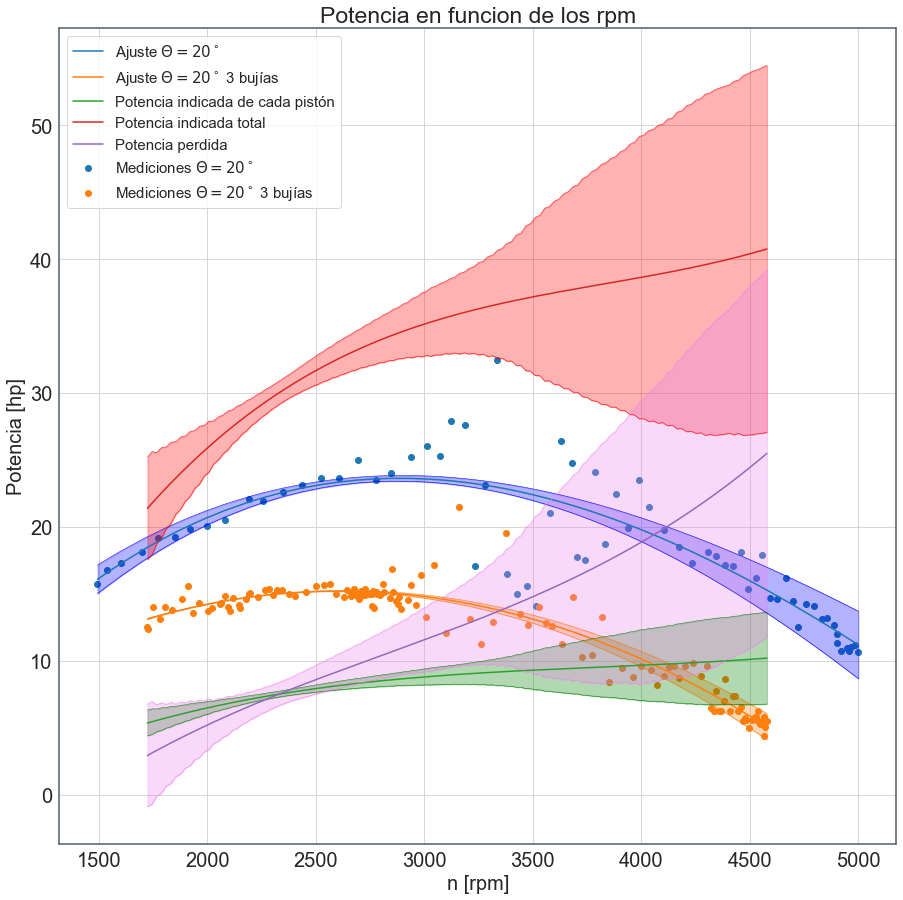

In [82]:
pf_3b, cov_3b = pf(rpm_3b-np.mean(rpm_3b), pot_3b-np.mean(pot_3b), 3, cov=True)
cov_3b = np.sqrt(cov_3b)
aj_3b = np.polyval(pf_3b, rpm_3b-np.mean(rpm_3b))+np.mean(pot_3b)
er_3b = (cov_3b[0,0]*(rpm_3b-np.mean(rpm_3b))**2+cov_3b[1,1]*(rpm_3b-np.mean(rpm_3b))**2+cov_3b[2,2]*(rpm_3b-np.mean(rpm_3b))+cov_3b[3,3])
aj_3b_p = aj_3b+er_3b
aj_3b_m = aj_3b-er_3b

rpm_ind_1 = np.flip(np.linspace(np.min(rpm_3b), np.max(rpm_3b), 132))
pot_ind_1 = np.polyval(pf_1, rpm_ind_1-np.mean(rpm_1))+np.mean(pot_1)-np.polyval(pf_3b, rpm_ind_1-np.mean(rpm_3b))-np.mean(pot_3b)
pot_ind_1_p = pot_ind_1+er_3b+np.repeat(er_1, 2)[4:-4]
pot_ind_1_m = pot_ind_1-er_3b-np.repeat(er_1, 2)[4:-4]
pot_ind_1_p_4 = 4*pot_ind_1+4*er_3b+np.repeat(er_1, 2)[4:-4]*4
pot_ind_1_m_4 = 4*pot_ind_1-4*er_3b-np.repeat(er_1, 2)[4:-4]*4

pot_perdidas = 4*pot_ind_1-np.polyval(pf_1, rpm_ind_1-np.mean(rpm_1))-np.mean(pot_1)
er_perdidas = 4*er_3b+np.repeat(er_1, 2)[4:-4]*4
pot_perdidas_p = pot_perdidas+er_perdidas
pot_perdidas_m = pot_perdidas-er_perdidas

print('Ajuste potencia posición 1 3 bujías: [c0={:.2f}, c1={:.2E}, c2={:.2E}, c3={:.2E}], r2={}'.format(pf_3b[3], pf_3b[2], pf_3b[1], pf_3b[0], r2_score(pot_1, aj_1)))

fig, ax1 = plt.subplots(figsize=(15,15))
ax1.scatter(rpm_1, pot_1, label=r'Mediciones $\Theta=20^\circ$')
ax1.plot(rpm_1, aj_1, label=r'Ajuste $\Theta=20^\circ$')
plt.fill_between(rpm_1, aj_1_p, aj_1_m, color='blue', alpha=0.3)
plt.plot(rpm_1, aj_1_p, color='blue', linewidth=0.5)
plt.plot(rpm_1, aj_1_m, color='blue', linewidth=0.5)

ax1.scatter(rpm_3b, pot_3b, label=r'Mediciones $\Theta=20^\circ$ 3 bujías')
ax1.plot(rpm_3b, aj_3b, label=r'Ajuste $\Theta=20^\circ$ 3 bujías')
plt.fill_between(rpm_3b, aj_3b_p, aj_3b_m, color='C1', alpha=0.3)
plt.plot(rpm_3b, aj_3b_p, color='C1', linewidth=0.5)
plt.plot(rpm_3b, aj_3b_m, color='C1', linewidth=0.5)

ax1.plot(rpm_ind_1, pot_ind_1, label='Potencia indicada de cada pistón')
plt.fill_between(rpm_ind_1, pot_ind_1_p, pot_ind_1_m, color='green', alpha=0.3)
plt.plot(rpm_ind_1, pot_ind_1_p, color='green', linewidth=0.5)
plt.plot(rpm_ind_1, pot_ind_1_m, color='green', linewidth=0.5)

ax1.plot(rpm_ind_1, 4*pot_ind_1, label='Potencia indicada total')
plt.fill_between(rpm_ind_1, pot_ind_1_p_4, pot_ind_1_m_4, color='red', alpha=0.3)
plt.plot(rpm_ind_1, pot_ind_1_p_4, color='red', linewidth=0.5)
plt.plot(rpm_ind_1, pot_ind_1_m_4, color='red', linewidth=0.5)

ax1.plot(rpm_ind_1, pot_perdidas, label='Potencia perdida')
plt.fill_between(rpm_ind_1, pot_perdidas_p, pot_perdidas_m, color='violet', alpha=0.3)
plt.plot(rpm_ind_1, pot_perdidas_p, color='violet', linewidth=0.5)
plt.plot(rpm_ind_1, pot_perdidas_m, color='violet', linewidth=0.5)

ax1.set_xlabel('n [rpm]')
ax1.set_ylabel('Potencia [hp]')
plt.title('Potencia en funcion de los rpm')
ax1.legend()
plt.savefig('potencia_indicada.pdf', format='pdf')
plt.show()

Notar: las perdidas mecanicas son lineales en la mayoria del tramo -> son las perdidas de la camisa con el pistón, ya que la fricción no depende las revoluciones. Luego a N mas grandes ya empiezan a ser predominante los otros efectos de fricción.

## Eficiencia mecánica

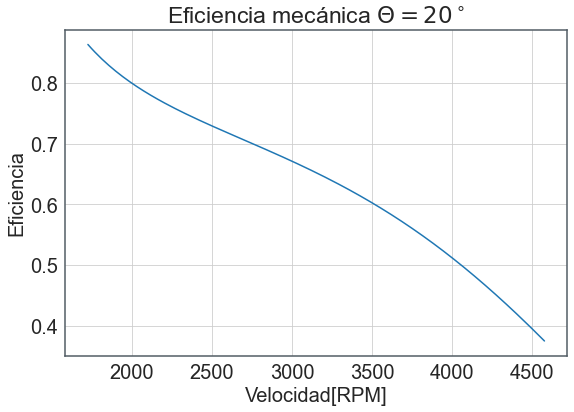

In [83]:
ef_mec = (np.polyval(pf_1, rpm_ind_1-np.mean(rpm_1))+np.mean(pot_1))/4/pot_ind_1
er_ef_mec = np.repeat(er_1, 2)[4:-4]/pot_ind_1/4+(er_3b+np.repeat(er_1, 2)[4:-4])*np.polyval(pf_1, rpm_ind_1)/pot_ind_1
ef_mec_p = ef_mec+er_ef_mec
ef_mec_m = ef_mec-er_ef_mec

fig = plt.figure(figsize=(9,6))
plt.plot(rpm_ind_1, ef_mec)
#plt.fill_between(rpm_ind_1, ef_mec_p, ef_mec_m, color='blue', alpha=0.3)
#plt.plot(rpm_ind_1, ef_mec_p, color='blue', linewidth=0.5)
#plt.plot(rpm_ind_1, ef_mec_m, color='blue', linewidth=0.5)
plt.ylabel('Eficiencia')
plt.xlabel('Velocidad[RPM]')
plt.title(r'Eficiencia mecánica $\Theta=20^\circ$')
plt.savefig('ef_mec.pdf', format='pdf')
plt.show()

## Cargo datos dia 2

In [84]:
medicion_1_2 = pd.read_csv('motor taunus/Posicion1_posicion2_eficiencias.csv', index_col=False)
medicion_3_4 = pd.read_csv('motor taunus/Posicion3_posicion4_eficiencias.csv', index_col=False)
caudal = pd.read_csv('motor taunus/Datos_eficiencia.csv', delimiter=';')

diametro_lata = np.array([72.4, 72.20, 72.7, 72.7, 72.7, 72.25, 72.7, 72.75, 72.35, 72.6]) #mm
diametro_lata, error_d_lata = np.mean(diametro_lata), np.std(diametro_lata) #mm
area_lata = np.pi*diametro_lata**2/4/1000**2 #m2
error_a_lata = 2*error_d_lata/diametro_lata*area_lata #m2
poder_calorifico = 42e6 #J/kg 

print(area_lata)
print(medicion_1_2.info())
print(caudal.info())

0.00413223595414983
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tiempo[seg]        1311 non-null   float64
 1   RPM_motor          1311 non-null   float64
 2   Torque_motor[kgm]  1311 non-null   float64
 3   Potencia[HP]       1311 non-null   float64
 4   Marcha             1311 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 51.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Posicion        24 non-null     int64  
 1   Rpm             24 non-null     int64  
 2   Velocidad[m/s]  24 non-null     float64
 3   caudal[kg/s]    24 non-null     float64
 4   Temperatura[K]  23 non-null     float64
 5   m1[g]           24 non-null     float64
 6   m2[g]         

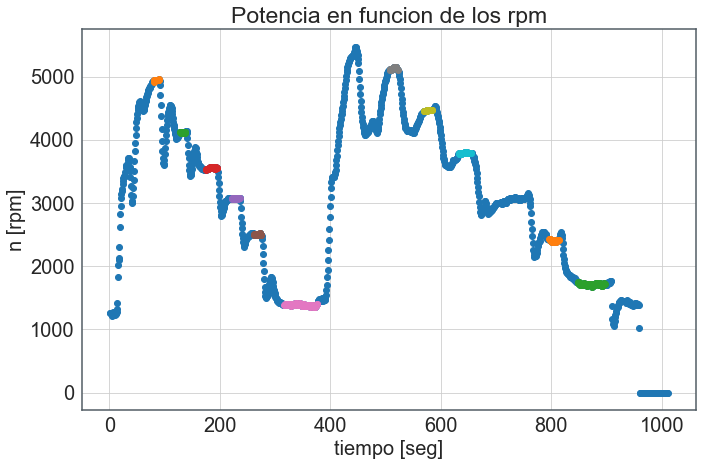

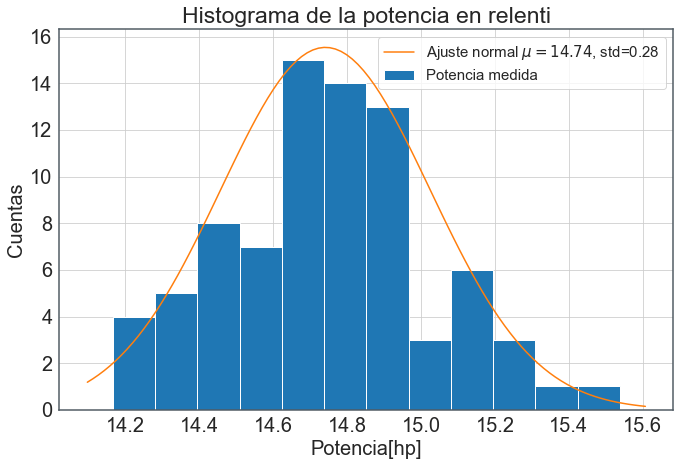

In [85]:
rpm_1_5000 = np.array(medicion_1_2['RPM_motor'][110:125])
pot_1_5000 = np.array(medicion_1_2['Potencia[HP]'][110:125])
t_1_5000 = np.array(medicion_1_2['Tiempo[seg]'][110:125])

rpm_1_4360 = np.array(medicion_1_2['RPM_motor'][175:190])
pot_1_4360 = np.array(medicion_1_2['Potencia[HP]'][175:190])
t_1_4360 = np.array(medicion_1_2['Tiempo[seg]'][175:190])

rpm_1_3720 = np.array(medicion_1_2['RPM_motor'][240:268])
pot_1_3720 = np.array(medicion_1_2['Potencia[HP]'][240:268])
t_1_3720 = np.array(medicion_1_2['Tiempo[seg]'][240:268])

rpm_1_3080 = np.array(medicion_1_2['RPM_motor'][303:323])
pot_1_3080 = np.array(medicion_1_2['Potencia[HP]'][303:323])
t_1_3080 = np.array(medicion_1_2['Tiempo[seg]'][303:323])

rpm_1_2440 = np.array(medicion_1_2['RPM_motor'][357:375])
pot_1_2440 = np.array(medicion_1_2['Potencia[HP]'][357:375])
t_1_2440 = np.array(medicion_1_2['Tiempo[seg]'][357:375])

rpm_1_1800 = np.array(medicion_1_2['RPM_motor'][430:510])
pot_1_1800 = np.array(medicion_1_2['Potencia[HP]'][430:510])
t_1_1800 = np.array(medicion_1_2['Tiempo[seg]'][430:510])

rpm_2_5000 = np.array(medicion_1_2['RPM_motor'][680:700])
pot_2_5000 = np.array(medicion_1_2['Potencia[HP]'][680:700])
t_2_5000 = np.array(medicion_1_2['Tiempo[seg]'][680:700])

rpm_2_4360 = np.array(medicion_1_2['RPM_motor'][760:780])
pot_2_4360 = np.array(medicion_1_2['Potencia[HP]'][760:780])
t_2_4360 = np.array(medicion_1_2['Tiempo[seg]'][760:780])

rpm_2_3720 = np.array(medicion_1_2['RPM_motor'][840:870])
pot_2_3720 = np.array(medicion_1_2['Potencia[HP]'][840:870])
t_2_3720 = np.array(medicion_1_2['Tiempo[seg]'][840:870])

rpm_2_3080 = np.array(medicion_1_2['RPM_motor'][930:990])
pot_2_3080 = np.array(medicion_1_2['Potencia[HP]'][930:990])
t_2_3080 = np.array(medicion_1_2['Tiempo[seg]'][930:990])

rpm_2_2440 = np.array(medicion_1_2['RPM_motor'][1045:1067])
pot_2_2440 = np.array(medicion_1_2['Potencia[HP]'][1045:1067])
t_2_2440 = np.array(medicion_1_2['Tiempo[seg]'][1045:1067])

rpm_2_1800 = np.array(medicion_1_2['RPM_motor'][1109:1170])
pot_2_1800 = np.array(medicion_1_2['Potencia[HP]'][1109:1170])
t_2_1800 = np.array(medicion_1_2['Tiempo[seg]'][1109:1170])

fig = plt.figure(figsize=(11, 7))
plt.scatter(medicion_1_2['Tiempo[seg]'], medicion_1_2['RPM_motor'])
plt.scatter(t_1_5000, rpm_1_5000, label='Posición 1, potencia {:.0f}'.format(np.mean(rpm_1_5000)))
plt.scatter(t_1_4360, rpm_1_4360, label='Posición 1, potencia {:.0f}'.format(np.mean(rpm_1_4360)))
plt.scatter(t_1_3720, rpm_1_3720, label='Posición 1, potencia {:.0f}'.format(np.mean(rpm_1_3720)))
plt.scatter(t_1_3080, rpm_1_3080, label='Posición 1, potencia {:.0f}'.format(np.mean(rpm_1_3080)))
plt.scatter(t_1_2440, rpm_1_2440, label='Posición 1, potencia {:.0f}'.format(np.mean(rpm_1_2440)))
plt.scatter(t_1_1800, rpm_1_1800, label='Posición 1, potencia {:.0f}'.format(np.mean(rpm_1_1800)))
plt.scatter(t_2_5000, rpm_2_5000, label='Posición 2, potencia {:.0f}'.format(np.mean(rpm_2_5000)))
plt.scatter(t_2_4360, rpm_2_4360, label='Posición 2, potencia {:.0f}'.format(np.mean(rpm_2_4360)))
plt.scatter(t_2_3720, rpm_2_3720, label='Posición 2, potencia {:.0f}'.format(np.mean(rpm_2_3720)))
plt.scatter(t_2_3080, rpm_2_3080, label='Posición 2, potencia {:.0f}'.format(np.mean(rpm_2_3080)))
plt.scatter(t_2_2440, rpm_2_2440, label='Posición 2, potencia {:.0f}'.format(np.mean(rpm_2_2440)))
plt.scatter(t_2_1800, rpm_2_1800, label='Posición 2, potencia {:.0f}'.format(np.mean(rpm_2_1800)))
plt.ylabel('n [rpm]')
plt.xlabel('tiempo [seg]')
plt.title('Potencia en funcion de los rpm')
#plt.legend()
plt.show()

mean,std=norm.fit(pot_1_1800)
fig = plt.figure(figsize=(11,7))
plt.hist(pot_1_1800, bins=12, label='Potencia medida')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = norm.pdf(x, mean, std)
y = y/np.max(y)*np.max(pot_1_1800)
plt.plot(x, y, label=r'Ajuste normal $\mu={:.2f}$, std={:.2f}'.format(mean, std))
plt.title('Histograma de la potencia en relenti')
plt.xlabel('Potencia[hp]')
plt.ylabel('Cuentas')
plt.legend(loc='upper right')
plt.show()

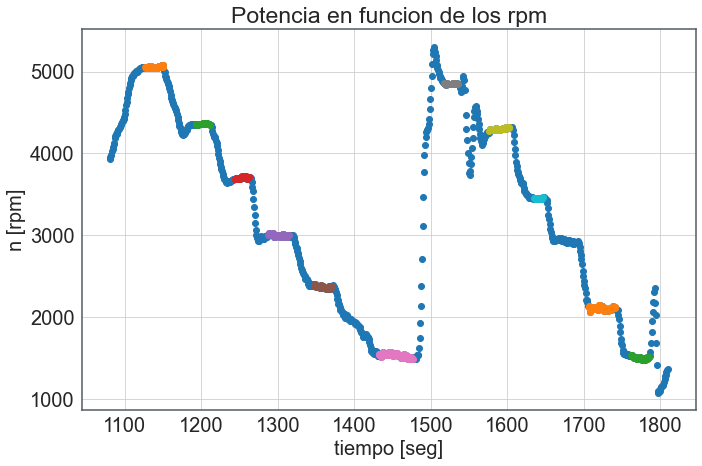

In [86]:
rpm_3_5000 = np.array(medicion_3_4['RPM_motor'][1460:1492])
pot_3_5000 = np.array(medicion_3_4['Potencia[HP]'][1460:1492])
t_3_5000 = np.array(medicion_3_4['Tiempo[seg]'][1460:1492])

rpm_3_4360 = np.array(medicion_3_4['RPM_motor'][1545:1570])
pot_3_4360 = np.array(medicion_3_4['Potencia[HP]'][1545:1570])
t_3_4360 = np.array(medicion_3_4['Tiempo[seg]'][1545:1570])

rpm_3_3720 = np.array(medicion_3_4['RPM_motor'][1610:1635])
pot_3_3720 = np.array(medicion_3_4['Potencia[HP]'][1640:1660])
t_3_3720 = np.array(medicion_3_4['Tiempo[seg]'][1610:1635])

rpm_3_3080 = np.array(medicion_3_4['RPM_motor'][1665:1700])
pot_3_3080 = np.array(medicion_3_4['Potencia[HP]'][1665:1700])
t_3_3080 = np.array(medicion_3_4['Tiempo[seg]'][1665:1700])

rpm_3_2440 = np.array(medicion_3_4['RPM_motor'][1740:1770])
pot_3_2440 = np.array(medicion_3_4['Potencia[HP]'][1740:1770])
t_3_2440 = np.array(medicion_3_4['Tiempo[seg]'][1740:1770])

rpm_3_1800 = np.array(medicion_3_4['RPM_motor'][1845:1900])
pot_3_1800 = np.array(medicion_3_4['Potencia[HP]'][1845:1900])
t_3_1800 = np.array(medicion_3_4['Tiempo[seg]'][1845:1900])

rpm_4_5000 = np.array(medicion_3_4['RPM_motor'][1950:1975])
pot_4_5000 = np.array(medicion_3_4['Potencia[HP]'][1950:1975])
t_4_5000 = np.array(medicion_3_4['Tiempo[seg]'][1950:1975])

rpm_4_4360 = np.array(medicion_3_4['RPM_motor'][2025:2060])
pot_4_4360 = np.array(medicion_3_4['Potencia[HP]'][2025:2060])
t_4_4360 = np.array(medicion_3_4['Tiempo[seg]'][2025:2060])

rpm_4_3720 = np.array(medicion_3_4['RPM_motor'][2100:2115])
pot_4_3720 = np.array(medicion_3_4['Potencia[HP]'][2100:2115])
t_4_3720 = np.array(medicion_3_4['Tiempo[seg]'][2100:2115])

rpm_4_3080 = np.array(medicion_3_4['RPM_motor'][2140:2165])
pot_4_3080 = np.array(medicion_3_4['Potencia[HP]'][2140:2165])
t_4_3080 = np.array(medicion_3_4['Tiempo[seg]'][2140:2165])

rpm_4_2440 = np.array(medicion_3_4['RPM_motor'][2190:2235])
pot_4_2440 = np.array(medicion_3_4['Potencia[HP]'][2190:2235])
t_4_2440 = np.array(medicion_3_4['Tiempo[seg]'][2190:2235])

rpm_4_1800 = np.array(medicion_3_4['RPM_motor'][2260:2290])
pot_4_1800 = np.array(medicion_3_4['Potencia[HP]'][2260:2290])
t_4_1800 = np.array(medicion_3_4['Tiempo[seg]'][2260:2290])

fig = plt.figure(figsize=(11, 7))
plt.scatter(medicion_3_4['Tiempo[seg]'].to_numpy()[1400:], medicion_3_4['RPM_motor'].to_numpy()[1400:])
plt.scatter(t_3_5000, rpm_3_5000, label='Posicion 3 potencia {:.0f}'.format(np.mean(rpm_3_5000)))
plt.scatter(t_3_4360, rpm_3_4360, label='Posicion 3 potencia {:.0f}'.format(np.mean(rpm_3_4360)))
plt.scatter(t_3_3720, rpm_3_3720, label='Posicion 3 potencia {:.0f}'.format(np.mean(rpm_3_3720)))
plt.scatter(t_3_3080, rpm_3_3080, label='Posicion 3 potencia {:.0f}'.format(np.mean(rpm_3_3080)))
plt.scatter(t_3_2440, rpm_3_2440, label='Posicion 3 potencia {:.0f}'.format(np.mean(rpm_3_2440)))
plt.scatter(t_3_1800, rpm_3_1800, label='Posicion 3 potencia {:.0f}'.format(np.mean(rpm_3_1800)))
plt.scatter(t_4_5000, rpm_4_5000, label='Posición 4 potencia {:.0f}'.format(np.mean(rpm_4_5000)))
plt.scatter(t_4_4360, rpm_4_4360, label='Posición 4 potencia {:.0f}'.format(np.mean(rpm_4_4360)))
plt.scatter(t_4_3720, rpm_4_3720, label='Posición 4 potencia {:.0f}'.format(np.mean(rpm_4_3720)))
plt.scatter(t_4_3080, rpm_4_3080, label='Posición 4 potencia {:.0f}'.format(np.mean(rpm_4_3080)))
plt.scatter(t_4_2440, rpm_4_2440, label='Posición 4 potencia {:.0f}'.format(np.mean(rpm_4_2440)))
plt.scatter(t_4_1800, rpm_4_1800, label='Posición 4 potencia {:.0f}'.format(np.mean(rpm_4_1800)))
plt.ylabel('n [rpm]')
plt.xlabel('tiempo [seg]')
plt.title('Potencia en funcion de los rpm')
#plt.legend(loc='lower left')
plt.show()

In [87]:
pot_1_5000 = np.mean(pot_1_5000)
dev_1_5000 = np.std(pot_1_5000)
pot_1_4360 = np.mean(pot_1_4360)
dev_1_4360 = np.std(pot_1_4360)
pot_1_3720 = np.mean(pot_1_3720)
dev_1_3720 = np.std(pot_1_3720)
pot_1_3080 = np.mean(pot_1_3080)
dev_1_3080 = np.std(pot_1_3080)
pot_1_2440 = np.mean(pot_1_2440)
dev_1_2440 = np.std(pot_1_2440)
pot_1_1800 = np.mean(pot_1_1800)
dev_1_1800 = np.std(pot_1_1800)
pot_1_ef = np.array([pot_1_1800, pot_1_2440, pot_1_3080, pot_1_3720, pot_1_4360, pot_1_5000])
dev_1_ef = np.array([dev_1_1800, dev_1_2440, dev_1_3080, dev_1_3720, dev_1_4360, dev_1_5000])
er_1_ef = np.array(dev_1_ef/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1])+pot_1_ef*745.7/poder_calorifico/(caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1])**2*(caudal['dcaudal'].to_numpy()[caudal['Posicion']==1])

pot_2_5000 = np.mean(pot_2_5000)
dev_2_5000 = np.std(pot_2_5000)
pot_2_4360 = np.mean(pot_2_4360)
dev_2_4360 = np.std(pot_2_4360)
pot_2_3720 = np.mean(pot_2_3720)
dev_2_3720 = np.std(pot_2_3720)
pot_2_3080 = np.mean(pot_2_3080)
dev_2_3080 = np.std(pot_2_3080)
pot_2_2440 = np.mean(pot_2_2440)
dev_2_2440 = np.std(pot_2_2440)
pot_2_1800 = np.mean(pot_2_1800)
dev_2_1800 = np.std(pot_2_1800)
pot_2_ef = np.array([pot_2_1800, pot_2_2440, pot_2_3080, pot_2_3720, pot_2_4360, pot_2_5000])
dev_2_ef = np.array([dev_2_1800, dev_2_2440, dev_2_3080, dev_2_3720, dev_2_4360, dev_2_5000])
er_2_ef = np.array(dev_2_ef/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==2])+pot_2_ef*745.7/poder_calorifico/(caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==2])**2*(caudal['dcaudal'].to_numpy()[caudal['Posicion']==2])


pot_3_5000 = np.mean(pot_3_5000)
dev_3_5000 = np.std(pot_3_5000)
pot_3_4360 = np.mean(pot_3_4360)
dev_3_4360 = np.std(pot_3_4360)
pot_3_3720 = np.mean(pot_3_3720)
dev_3_3720 = np.std(pot_3_3720)
pot_3_3080 = np.mean(pot_3_3080)
dev_3_3080 = np.std(pot_3_3080)
pot_3_2440 = np.mean(pot_3_2440)
dev_3_2440 = np.std(pot_3_2440)
pot_3_1800 = np.mean(pot_3_1800)
dev_3_1800 = np.std(pot_3_1800)
pot_3_ef = np.array([pot_3_1800, pot_3_2440, pot_3_3080, pot_3_3720, pot_3_4360, pot_3_5000])
dev_3_ef = np.array([dev_3_1800, dev_3_2440, dev_3_3080, dev_3_3720, dev_3_4360, dev_3_5000])
er_3_ef = np.array(dev_3_ef/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==3])+pot_3_ef*745.7/poder_calorifico/(caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==3])**2*(caudal['dcaudal'].to_numpy()[caudal['Posicion']==3])


pot_4_5000 = np.mean(pot_4_5000)
dev_4_5000 = np.std(pot_4_5000)
pot_4_4360 = np.mean(pot_4_4360)
dev_4_4360 = np.std(pot_4_4360)
pot_4_3720 = np.mean(pot_4_3720)
dev_4_3720 = np.std(pot_4_3720)
pot_4_3080 = np.mean(pot_4_3080)
dev_4_3080 = np.std(pot_4_3080)
pot_4_2440 = np.mean(pot_4_2440)
dev_4_2440 = np.std(pot_4_2440)
pot_4_1800 = np.mean(pot_4_1800)
dev_4_1800 = np.std(pot_4_1800)
pot_4_ef = np.array([pot_4_1800, pot_4_2440, pot_4_3080, pot_4_3720, pot_4_4360, pot_4_5000])
dev_4_ef = np.array([dev_4_1800, dev_4_2440, dev_4_3080, dev_4_3720, dev_4_4360, dev_4_5000])
er_4_ef = np.array(dev_4_ef/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==4])+pot_4_ef*745.7/poder_calorifico/(caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==4])**2*(caudal['dcaudal'].to_numpy()[caudal['Posicion']==4])


## Rendimiento termico

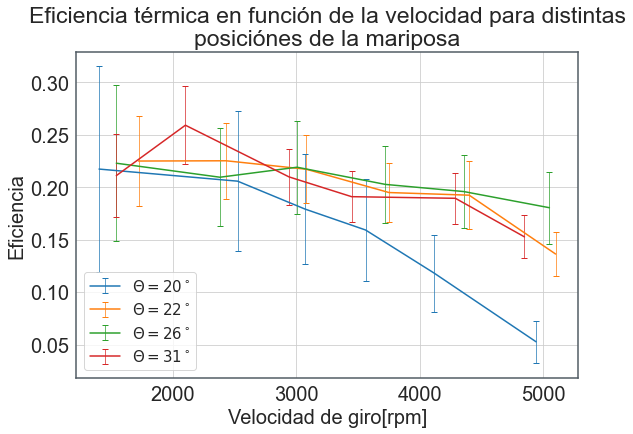

In [124]:
fig = plt.figure(figsize=(9,6))
#plt.plot(caudal['Rpm'].to_numpy()[caudal['Posicion']==1], pot_1_ef*745.7/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1], label='$\Theta=20^\circ$')
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==1], pot_1_ef*745.7/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1], er_1_ef, label='$\Theta=20^\circ$', elinewidth=0.7, capsize=3)
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==2], pot_2_ef*745.7/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==2], er_2_ef, label='$\Theta=22^\circ$', elinewidth=0.7, capsize=3)
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==3], pot_3_ef*745.7/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==3], er_3_ef, label='$\Theta=26^\circ$', elinewidth=0.7, capsize=3) 
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==4], pot_3_ef*745.7/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==4], er_4_ef, label='$\Theta=31^\circ$', elinewidth=0.7, capsize=3)
plt.xlabel('Velocidad de giro[rpm]')
plt.ylabel('Eficiencia')
plt.legend()
plt.title('\n'.join(wrap('Eficiencia térmica en función de la velocidad para distintas posiciónes de la mariposa')))
plt.savefig('ef_termica.pdf', format='pdf')
plt.show()

## Rendimiento termodinámico

D:\Anaconda3\envs\DL\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\Anaconda3\envs\DL\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


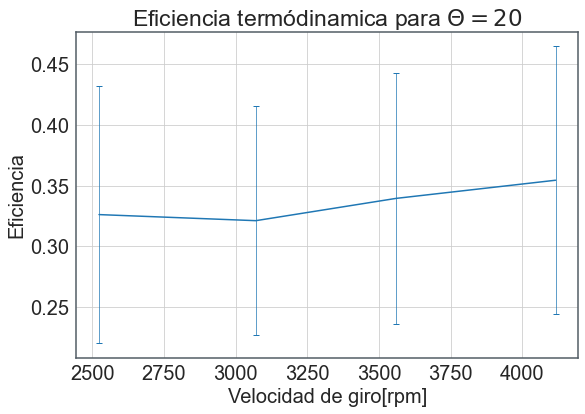

In [126]:
pot_ind_ef_1 = 4*np.array([np.mean(pot_ind_1[np.where((rpm_ind_1 >= np.mean(rpm_1_1800)-50) & (rpm_ind_1 <= np.mean(rpm_1_1800)+50))]),
                      np.mean(pot_ind_1[np.where((rpm_ind_1 >= np.mean(rpm_1_2440)-50) & (rpm_ind_1 <= np.mean(rpm_1_2440)+50))]),
                      np.mean(pot_ind_1[np.where((rpm_ind_1 >= np.mean(rpm_1_3080)-50) & (rpm_ind_1 <= np.mean(rpm_1_3080)+50))]),
                      np.mean(pot_ind_1[np.where((rpm_ind_1 >= np.mean(rpm_1_3720)-50) & (rpm_ind_1 <= np.mean(rpm_1_3720)+50))]),
                      np.mean(pot_ind_1[np.where((rpm_ind_1 >= np.mean(rpm_1_4360)-50) & (rpm_ind_1 <= np.mean(rpm_1_4360)+50))]),
                      np.mean(pot_ind_1[np.where((rpm_ind_1 >= np.mean(rpm_1_5000)-50) & (rpm_ind_1 <= np.mean(rpm_1_5000)+50))])])
aux=(er_3b+np.repeat(er_1, 2)[4:-4]).to_numpy()
er_pot_ind_1 = np.array([np.mean(aux[np.where((rpm_ind_1 >= np.mean(rpm_1_1800)-50) & (rpm_ind_1 <= np.mean(rpm_1_1800)+50))]),
                      np.mean(aux[np.where((rpm_ind_1 >= np.mean(rpm_1_2440)-50) & (rpm_ind_1 <= np.mean(rpm_1_2440)+50))]),
                      np.mean(aux[np.where((rpm_ind_1 >= np.mean(rpm_1_3080)-50) & (rpm_ind_1 <= np.mean(rpm_1_3080)+50))]),
                      np.mean(aux[np.where((rpm_ind_1 >= np.mean(rpm_1_3720)-50) & (rpm_ind_1 <= np.mean(rpm_1_3720)+50))]),
                      np.mean(aux[np.where((rpm_ind_1 >= np.mean(rpm_1_4360)-50) & (rpm_ind_1 <= np.mean(rpm_1_4360)+50))]),
                      np.mean(aux[np.where((rpm_ind_1 >= np.mean(rpm_1_5000)-50) & (rpm_ind_1 <= np.mean(rpm_1_5000)+50))])]) 
er_ind_1_ef = np.array(er_pot_ind_1/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1])+pot_ind_ef_1*745.7/poder_calorifico/(caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1])**2*(caudal['dcaudal'].to_numpy()[caudal['Posicion']==1])

rpm_ef = caudal['Rpm'].to_numpy()[caudal['Posicion']==1]
caud_ef = caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1]

fig = plt.figure(figsize=(9,6))
plt.errorbar(rpm_ef, pot_ind_ef_1*745.7/poder_calorifico/caud_ef, er_ind_1_ef, elinewidth=0.7, capsize=3)
plt.title(r'Eficiencia termódinamica para $\Theta=20$')
plt.xlabel('Velocidad de giro[rpm]')
plt.ylabel('Eficiencia')
plt.savefig('ef_termodinamica.pdf', format='pdf')
plt.show()

nota: para pos 2, 3, 4 calcule la potencia indicada utilizando las perdidas mecánicas de la posicion 1 lo cual no esta bien pq la potencia de bombeo aumenta un monton con la posicion de la mariposa

## Eficiencia volumétrica

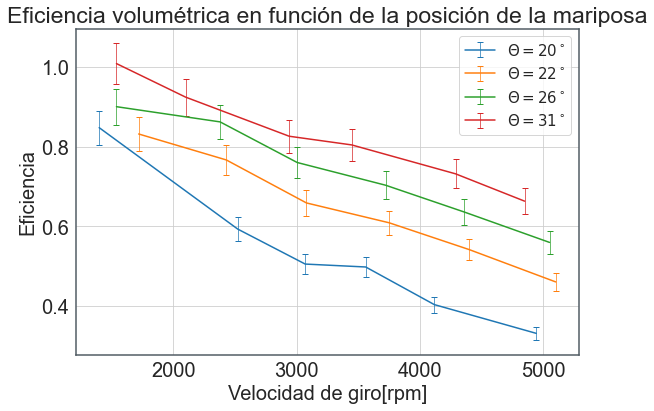

In [123]:
fig = plt.figure(figsize=(9, 6))
er_v_1 = 2*area_lata/2.3e-3/(caudal['Rpm'].to_numpy()[caudal['Posicion']==1]/60)*caudal['dv'].to_numpy()[caudal['Posicion']==1]
er_v_2 = 2*area_lata/2.3e-3/(caudal['Rpm'].to_numpy()[caudal['Posicion']==2]/60)*caudal['dv'].to_numpy()[caudal['Posicion']==2]
er_v_3 = 2*area_lata/2.3e-3/(caudal['Rpm'].to_numpy()[caudal['Posicion']==3]/60)*caudal['dv'].to_numpy()[caudal['Posicion']==3]
er_v_4 = 2*area_lata/2.3e-3/(caudal['Rpm'].to_numpy()[caudal['Posicion']==4]/60)*caudal['dv'].to_numpy()[caudal['Posicion']==4]
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==1], area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==1]/(2.3*1e-3*caudal['Rpm'].to_numpy()[caudal['Posicion']==1]/60/2),er_v_1 ,label=r'$\Theta=20^\circ$', elinewidth=0.7, capsize=3)
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==2], area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==2]/(2.3*1e-3*caudal['Rpm'].to_numpy()[caudal['Posicion']==2]/60/2),er_v_2 ,label=r'$\Theta=22^\circ$', elinewidth=0.7, capsize=3)
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==3], area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==3]/(2.3*1e-3*caudal['Rpm'].to_numpy()[caudal['Posicion']==3]/60/2),er_v_3 ,label=r'$\Theta=26^\circ$', elinewidth=0.7, capsize=3)
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==4], area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==4]/(2.3*1e-3*caudal['Rpm'].to_numpy()[caudal['Posicion']==4]/60/2),er_v_4 ,label=r'$\Theta=31^\circ$', elinewidth=0.7, capsize=3)
plt.title('\n'.join(wrap('Eficiencia volumétrica en función de la posición de la mariposa')))
plt.xlabel('Velocidad de giro[rpm]')
plt.ylabel('Eficiencia')
plt.legend()
plt.savefig('ef_vol.pdf', format='pdf')
plt.show()

## Comparación eficiencia termica y termodinámica

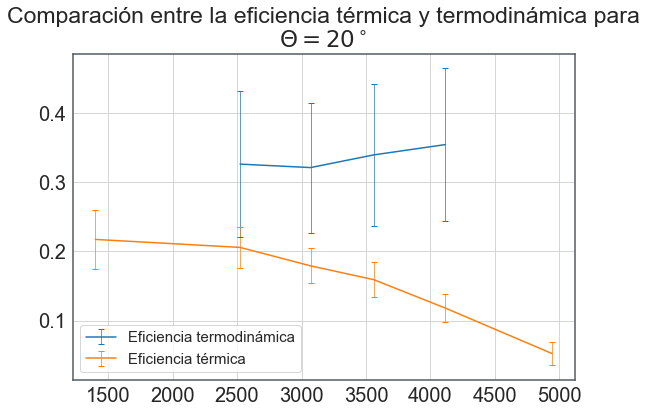

In [127]:
fig = plt.figure(figsize=(9,6))
plt.errorbar(rpm_ef, pot_ind_ef_1*745.7/poder_calorifico/caud_ef, er_ind_1_ef, label='Eficiencia termodinámica', elinewidth=0.7, capsize=3)
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==1], pot_1_ef*745.7/poder_calorifico/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1], er_v_1 ,label='Eficiencia térmica', elinewidth=0.7, capsize=3)
plt.legend()
plt.title('\n'.join(wrap(r'Comparación entre la eficiencia térmica y termodinámica para $\Theta=20^\circ$')))
plt.savefig('com_ef.pdf', format='pdf')
plt.show()

Nota: medimos dos dias distintos con condiciones climaticas muy distintas

## Relación aire combustible

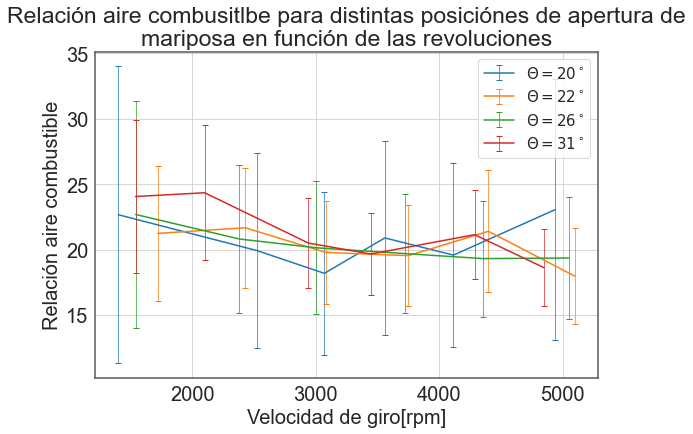

In [122]:
fig = plt.figure(figsize=(9,6))
er_ac_1 = 1.2*area_lata/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1]*caudal['dv'].to_numpy()[caudal['Posicion']==1]+1.2*area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==1]/(caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1])**2*caudal['dcaudal'].to_numpy()[caudal['Posicion']==1]
er_ac_2 = 1.2*area_lata/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==2]*caudal['dv'].to_numpy()[caudal['Posicion']==2]+1.2*area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==2]/(caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==2])**2*caudal['dcaudal'].to_numpy()[caudal['Posicion']==2]
er_ac_3 = 1.2*area_lata/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==3]*caudal['dv'].to_numpy()[caudal['Posicion']==3]+1.2*area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==3]/(caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==3])**2*caudal['dcaudal'].to_numpy()[caudal['Posicion']==3]
er_ac_4 = 1.2*area_lata/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==4]*caudal['dv'].to_numpy()[caudal['Posicion']==4]+1.2*area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==4]/(caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==4])**2*caudal['dcaudal'].to_numpy()[caudal['Posicion']==4]

plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==1], 1.2*area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==1]/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==1], er_ac_1, label=r'$\Theta=20^\circ$', elinewidth=0.7, capsize=3)
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==2], 1.2*area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==2]/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==2], er_ac_2, label=r'$\Theta=22^\circ$', elinewidth=0.7, capsize=3)
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==3], 1.2*area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==3]/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==3], er_ac_3, label=r'$\Theta=26^\circ$', elinewidth=0.7, capsize=3)
plt.errorbar(caudal['Rpm'].to_numpy()[caudal['Posicion']==4], 1.2*area_lata*caudal['Velocidad[m/s]'].to_numpy()[caudal['Posicion']==4]/caudal['caudal[kg/s]'].to_numpy()[caudal['Posicion']==4], er_ac_4, label=r'$\Theta=31^\circ$', elinewidth=0.7, capsize=3)
plt.xlabel('Velocidad de giro[rpm]')
plt.ylabel('Relación aire combustible')
plt.title('\n'.join(wrap('Relación aire combusitlbe para distintas posiciónes de apertura de mariposa en función de las revoluciones')))
plt.legend()
plt.savefig('ac.pdf', format='pdf')
plt.show()

## Ajuste eficiencia volumétrica

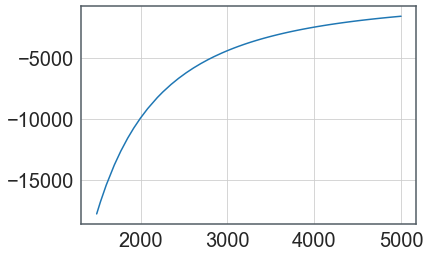

In [145]:

eta_v = 2*area_lata/2.3e-3/(rpm_1/60)*(743.058*(-413/(rpm_1/60))+(0.0141*np.sqrt(8.64e8-1587*k*(rpm_1/60)**2))/(rpm_1/60))/k
plt.plot(rpm_1, eta_v)
plt.show()